In [40]:
# ========================================
# 1. IMPORT LIBRARIES
# ========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

In [41]:
# ========================================
# 2. LOAD DATASET
# ========================================
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
# ========================================
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# ========================================

# Info & Missing Values
print("Dataset info:")
print(df.info())

print()

print("\nMissing values:")
print(df.isnull().sum())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [43]:
# Statistical summary
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


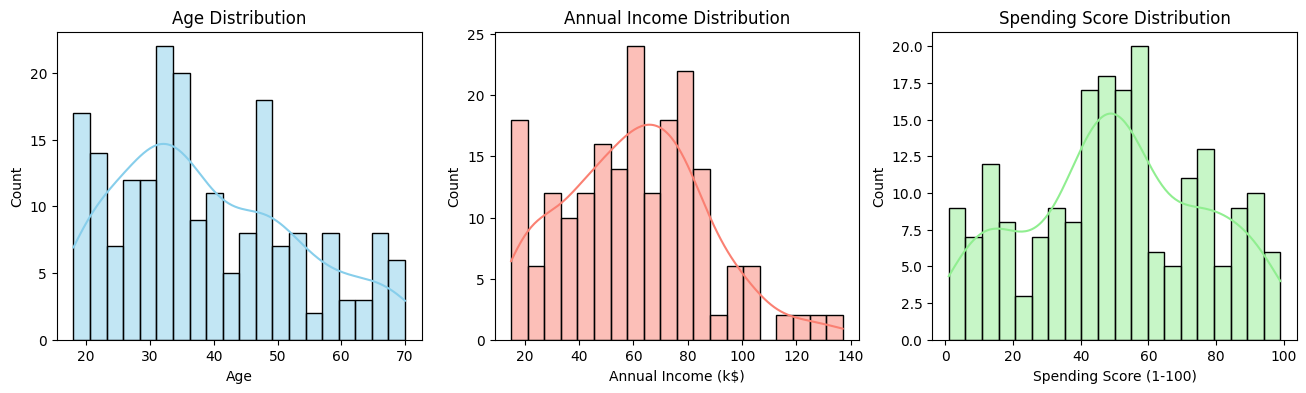

In [44]:
# Visualisasi distribusi umur, income, spending score
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')

plt.subplot(1,3,2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='salmon')
plt.title('Annual Income Distribution')

plt.subplot(1,3,3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='lightgreen')
plt.title('Spending Score Distribution')

plt.show()

In [45]:
# ========================================
# 4. PREPROCESSING
# ========================================

# Encode Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Select numerical features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

X = df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

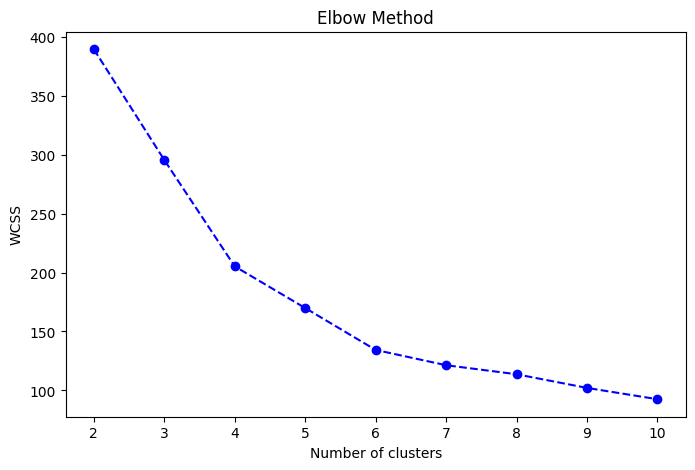

In [46]:
# ========================================
# 5. DETERMINE OPTIMAL NUMBER OF CLUSTERS
# ========================================

wcss = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(2,11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Clusters: {k}, Silhouette Score: {score:.3f}")

Clusters: 2, Silhouette Score: 0.335
Clusters: 3, Silhouette Score: 0.358
Clusters: 4, Silhouette Score: 0.404
Clusters: 5, Silhouette Score: 0.408
Clusters: 6, Silhouette Score: 0.431
Clusters: 7, Silhouette Score: 0.410
Clusters: 8, Silhouette Score: 0.367
Clusters: 9, Silhouette Score: 0.374
Clusters: 10, Silhouette Score: 0.362


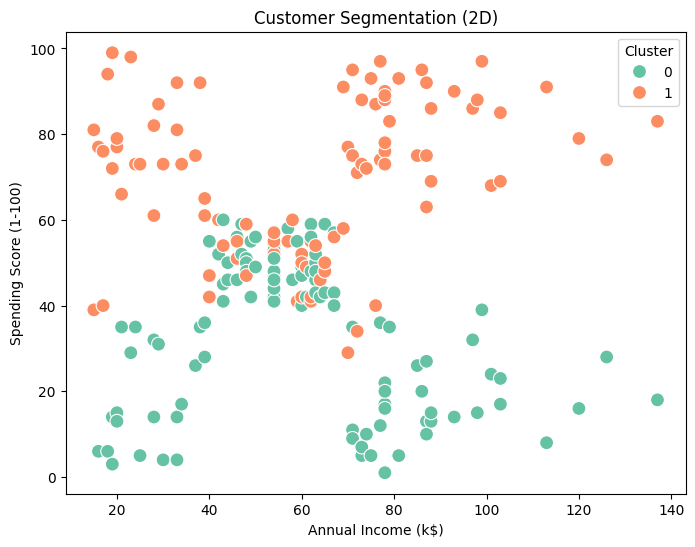

In [48]:
# ========================================
# 6. APPLY KMEANS CLUSTERING
# ========================================

optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# ========================================
# 7. 2D VISUALIZATION
# ========================================

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='Set2',
    s=100
)
plt.title('Customer Segmentation (2D)')
plt.show()

In [49]:
# ========================================
# 8. 3D INTERACTIVE VISUALIZATION
# ========================================

fig = px.scatter_3d(
    df,
    x='Age',
    y='Annual Income (k$)',
    z='Spending Score (1-100)',
    color='Cluster',
    size_max=10,
    title='Customer Segmentation (3D)',
    hover_data=['Gender']
)
fig.show()

In [50]:
# ========================================
# 9. INSIGHT ANALYSIS
# ========================================

for cluster in range(optimal_k):
    print(f"\nCluster {cluster} Summary:")
    print(df[df['Cluster']==cluster][features].describe())


Cluster 0 Summary:
              Age  Annual Income (k$)  Spending Score (1-100)
count  103.000000          103.000000              103.000000
mean    48.728155           60.495146               32.184466
std     11.931335           25.217436               17.954598
min     19.000000           16.000000                1.000000
25%     41.000000           43.500000               15.000000
50%     49.000000           60.000000               35.000000
75%     57.500000           77.500000               48.000000
max     70.000000          137.000000               60.000000

Cluster 1 Summary:
             Age  Annual Income (k$)  Spending Score (1-100)
count  97.000000           97.000000               97.000000
mean   28.360825           60.628866               69.329897
std     6.113826           27.464492               17.939552
min    18.000000           15.000000               29.000000
25%    23.000000           39.000000               55.000000
50%    29.000000           62.000000